In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import IPython.display as display
#from PIL import Image                 # NOTE: PIL is not maintained but Pillow is, and this line works with it...
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# use this to look at which datasets are included
#tfds.list_builders()
(ds_train,ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, data_dir='c:\\tensorflow-datasets',as_supervised=True,with_info=True)
assert isinstance(ds_train, tf.data.Dataset)
assert isinstance(ds_test, tf.data.Dataset)
print(ds_train)
#print(sum(1 for i in ds_train)) # too slow, plus it "uses up" iterator
print('Size of train set: ' + np.array2string(tf.data.experimental.cardinality(ds_train).numpy()))
print('Size of train set: ' + str(ds_info.splits['train'].num_examples)) # better?
#print(sum(1 for i in ds_test)) # too slow, plus it "uses up" iterator
print(ds_test)
print('Size of test set: ' + np.array2string(tf.data.experimental.cardinality(ds_test).numpy()))
print('Size of test set: ' + str(ds_info.splits['test'].num_examples)) 

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>
Size of train set: 60000
Size of train set: 60000
<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>
Size of test set: 10000
Size of test set: 10000


In [3]:
ds_explore = ds_train
myit = iter(ds_explore)

True Label: 7


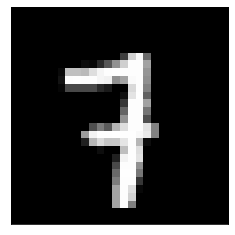

In [4]:
thisInstance = next(myit)
fig = plt.imshow(thisInstance[0].numpy().squeeze(),cmap='gray', vmin=0, vmax=255)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
#img = Image.fromarray(next(myit)["image"])
#img.show
print('True Label: ' + np.array2string(thisInstance[1].numpy()) )

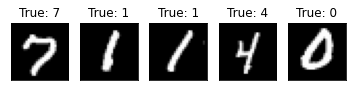

In [5]:
fig,sp_axes = plt.subplots(1,5)
subplotIdx = 0
for inst in ds_explore.take(5):
    sp_axes[subplotIdx].imshow(inst[0].numpy().squeeze(),cmap='gray',vmin=0,vmax=255)
    sp_axes[subplotIdx].get_xaxis().set_visible(False)
    sp_axes[subplotIdx].get_yaxis().set_visible(False)
    sp_axes[subplotIdx].set_title( 'True: ' + np.array2string(inst[1].numpy()) )
    subplotIdx += 1

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# https://www.tensorflow.org/datasets/keras_example
def normalize_img(image, label):   
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [10]:
# https://www.tensorflow.org/datasets/keras_example
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [11]:
history = model.fit(ds_train,epochs=1,validation_data=ds_test)

469/469 [==============================] - 40s 85ms/step - loss: 0.2366 - accuracy: 0.9298 - val_loss: 0.0669 - val_accuracy: 0.9790
